In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv("gdrive/My Drive/Colab Notebooks/Capstone/ForEx_Dataset.csv")

In [ ]:
df = df[['Date', 'CAN']]

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df_month = df.resample('MS').mean()
print('Count of The Monthly Data Frame : ',df_month.shape[0])
df_month.head()

Count of The Monthly Data Frame :  216


,CAN
Date,
2006-01-01,38.242818
2006-02-01,38.510800
2006-03-01,38.351652
2006-04-01,39.211500
2006-05-01,40.787739


<Axes: xlabel='Date'>

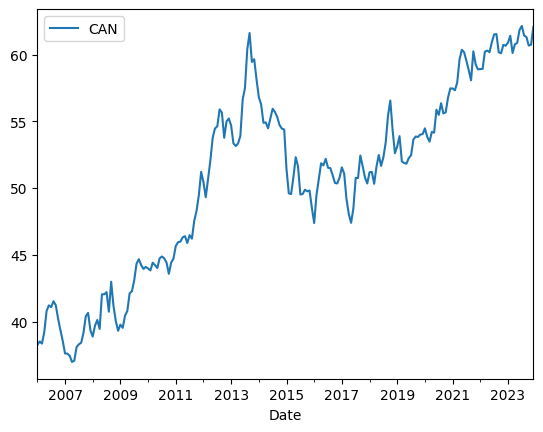

In [ ]:
df_month.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
x=df_month['CAN']
result=adfuller(x)
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Stataics  -1.245500229628585
p-value 0.6537230120846698
critical values 559.5268493155365
Reject the null hypotheise , it mean data is not stationary


In [ ]:
df_month['CAN_1']=df_month['CAN'].diff().dropna()

<Axes: xlabel='Date'>

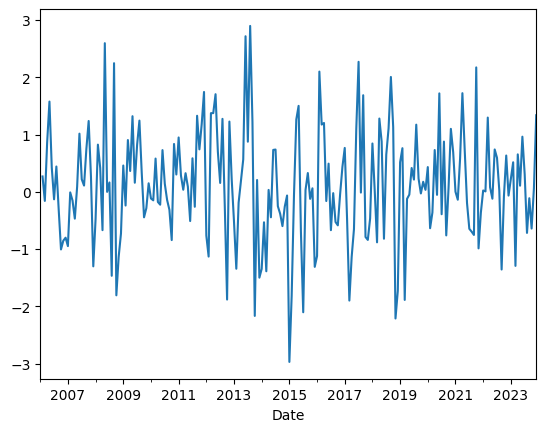

In [ ]:
df_month['CAN_1'].plot()

In [ ]:
x=df_month['CAN_1'].dropna()
result=adfuller(x)
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Stataics  -12.29400892267841
p-value 7.712336454624692e-23
critical values 558.6039726692059
fail to reject null hypothese h1 , it mean data is stationary


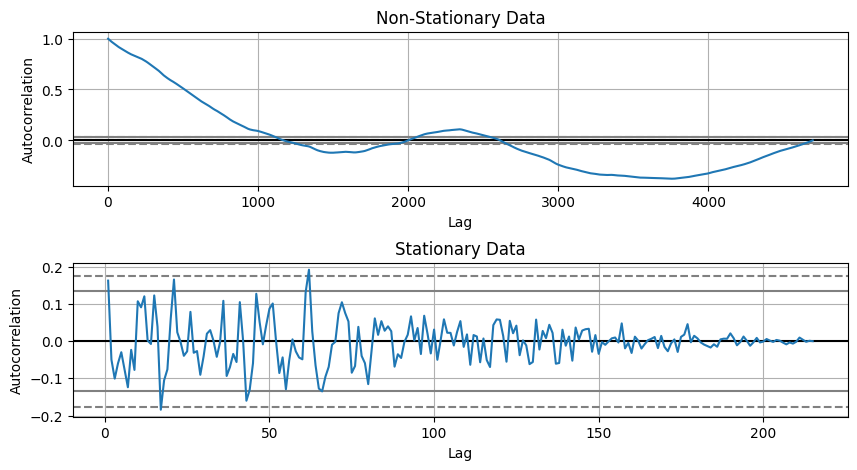

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = autocorrelation_plot(df, ax = ax1)
ax1.set_title('Non-Stationary Data')
ax2 = autocorrelation_plot(x, ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace = 0.5)
plt.show()

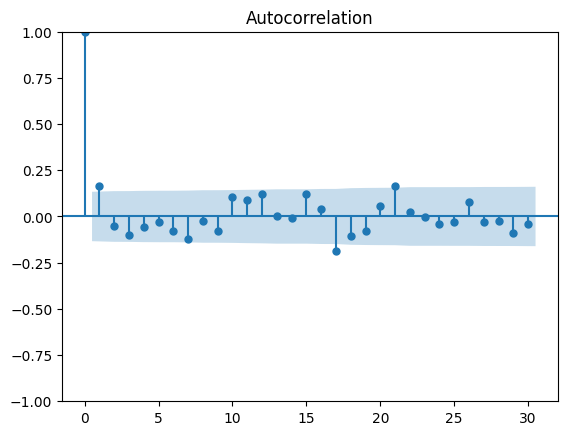

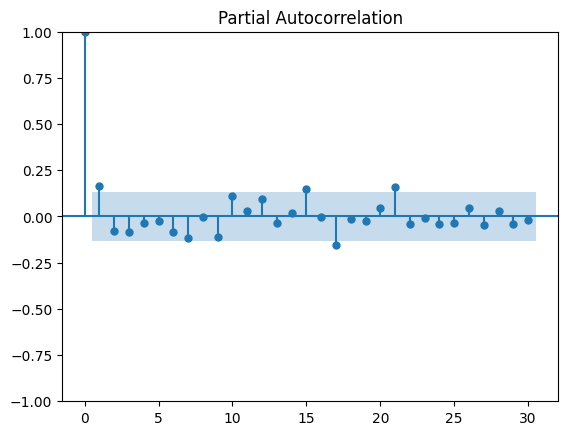

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

plot_acf(df_month['CAN_1'].iloc[1:],lags=30)
plot_pacf(df_month['CAN_1'].iloc[1:],lags=30)
plt.show()

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.2 MB/s eta 0:00:00


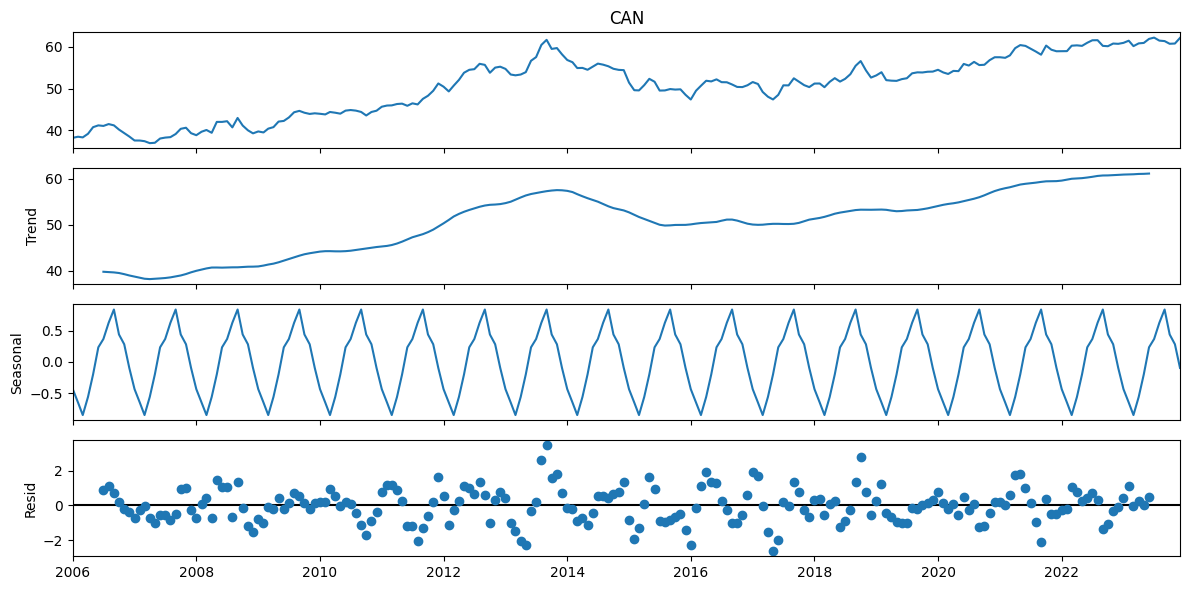

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')


from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize']=(12,6)
decomposition = seasonal_decompose(df_month['CAN'] , period = 12, model = 'additive')
decomposition.plot()
plt.savefig('Discription , trend , seasonal , residuals.png')
plt.show()


In [ ]:
model = auto_arima(x, m=12, d=1, seasonal=True,
                   start_p=0, start_q=0, max_p=5, max_q=5,
                   start_P=0, start_Q=0, max_P=5, max_Q=5,
                   max_order=None,  # Allow more flexibility in choosing orders
                   trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=707.299, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=678.421, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=705.303, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=677.728, Time=0.06 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=678.171, Time=0.15 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=673.478, Time=0.43 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=674.681, Time=0.92 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=674.914, Time=0.89 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=677.482, Time=0.46 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=679.471, Time=0.36 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=675.481, Time=4.13 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=660.434, Time=0.54 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AI

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df_month['CAN'],order=(5,1,0),seasonal_order=(0,1,1,17), enforce_stationarity=False,
                                  enforce_invertibility=False)
result=model.fit(disp=False)

In [ ]:
predictions = result.predict(typ = 'levels')

In [ ]:
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df_month['CAN'],predictions)),'\n')
print('Mean Squared Error : ',mean_squared_error(df_month['CAN'],predictions),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df_month['CAN'],predictions),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df_month['CAN'],predictions)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_month['CAN'],predictions)))

Evaluation Result for whole data :  

R2 Score for whole data : 78.46 % 

Mean Squared Error :  10.69850441074532 

Mean Absolute Error :  1.1276163887989885 

Root Mean Squared Error :  3.2708568312821824 

Mean Absolute Percentage Error : 2.45 %


<Axes: xlabel='Date'>

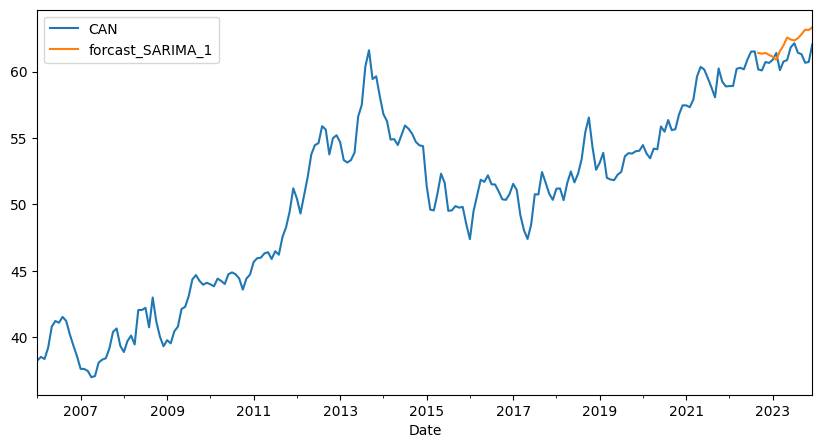

In [ ]:
df_month['forcast_SARIMA_1']=result.predict(start=200, end=216 ,dynamic=True)
df_month[['CAN','forcast_SARIMA_1']].plot(figsize=(10, 5))

In [ ]:
import datetime
from dateutil.relativedelta import relativedelta

start = datetime.datetime.strptime("01-01-2024", "%d-%m-%Y")
date_list = [start + relativedelta(months=x) for x in range(0, 36)]
future_prediction = pd.DataFrame(index=date_list, columns=df_month.columns)
df_month = pd.concat([df_month, future_prediction])

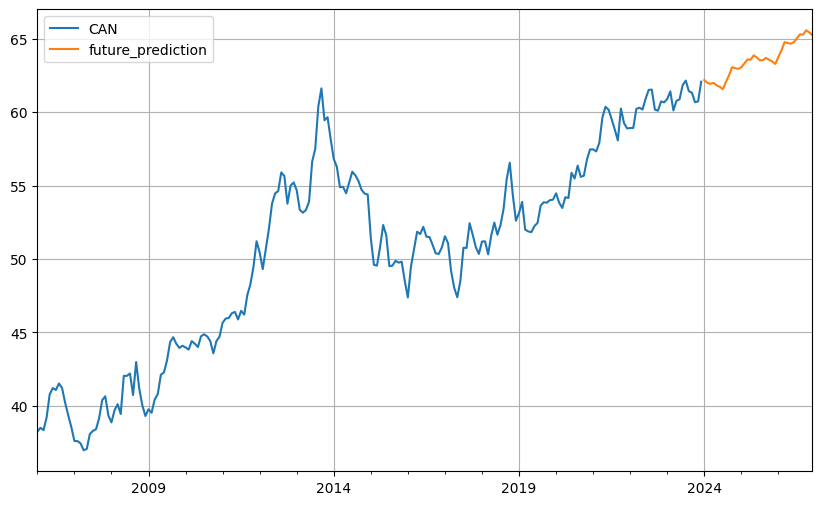

In [ ]:
df_month['future_prediction']=result.predict(start=216, end=255,dynamic=True)
df_month[['CAN','future_prediction']].plot(figsize=(10, 6))
plt.grid(True)

In [ ]:
filtered_df = df_month['2023':'2026']
filtered_df

,CAN,forcast_SARIMA_1,future_prediction
2023-01-01,60.890318,61.132158,NaN
2023-02-01,61.406000,60.898930,NaN
2023-03-01,60.112217,61.544816,NaN
2023-04-01,60.766050,61.979485,NaN
2023-05-01,60.872957,62.574886,NaN
2023-06-01,61.835682,62.423256,NaN
2023-07-01,62.141714,62.350474,NaN
2023-08-01,61.423957,62.519896,NaN
2023-09-01,61.312095,62.823252,NaN
2023-10-01,60.670273,63.163297,NaN


In [ ]:
df_month.to_csv("gdrive/My Drive/Colab Notebooks/Capstone/Sarima_CAN.csv", index=True)

In [ ]:
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df_month['CAN'],predictions)),'\n')
print('Mean Squared Error : ',mean_squared_error(df_month['CAN'],predictions),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df_month['CAN'],predictions),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df_month['CAN'],predictions)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_month['CAN'],predictions)))

Evaluation Result for whole data :  

R2 Score for whole data : 84.35 % 

Mean Squared Error :  7.581642977500728 

Mean Absolute Error :  0.7307264856877119 

Root Mean Squared Error :  2.753478341571026 

Mean Absolute Percentage Error : 1.56 %


<Axes: xlabel='Date'>

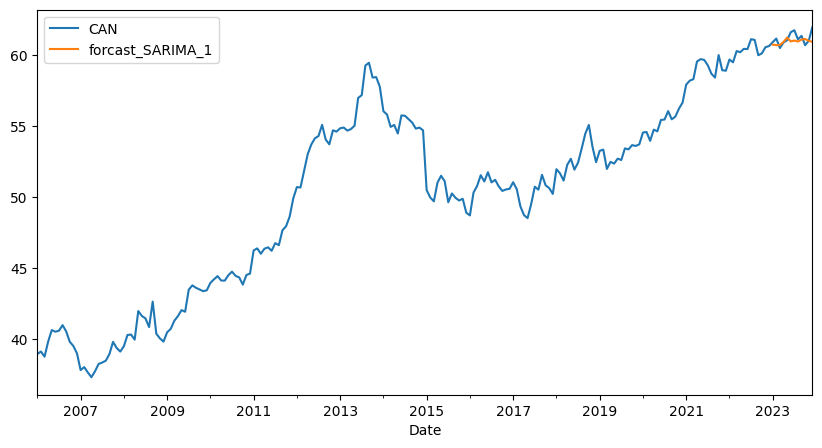

In [ ]:
df_month['forcast_SARIMA_1']=result.predict(start=204, end=216 ,dynamic=True)
df_month[['CAN','forcast_SARIMA_1']].plot(figsize=(10, 5))

In [ ]:
pred = result.get_prediction(start=pd.to_datetime('2020-05-01'),
dynamic=False, full_results=True)
pred_ci = pred.conf_int()

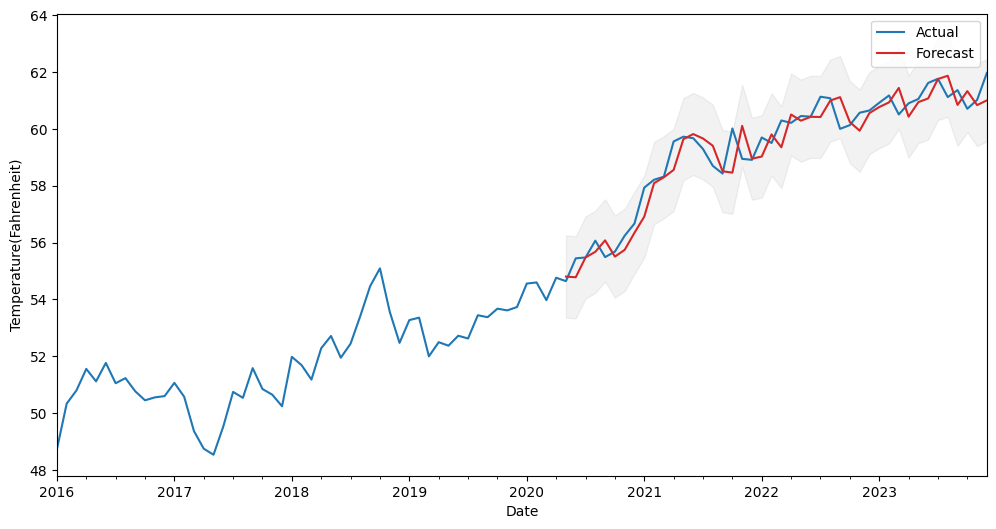

In [ ]:
ax = df_month.CAN['2016':].plot(label='Actual', color='tab:blue')
pred.predicted_mean.plot(ax=ax, label='Forecast', color='tab:red')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.05)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature(Fahrenheit)')
plt.legend()
plt.show()

In [ ]:
import datetime
from dateutil.relativedelta import relativedelta

start = datetime.datetime.strptime("01-01-2024", "%d-%m-%Y")
date_list = [start + relativedelta(months=x) for x in range(0, 36)]
future_prediction = pd.DataFrame(index=date_list, columns=df_month.columns)
df_month = pd.concat([df_month, future_prediction])

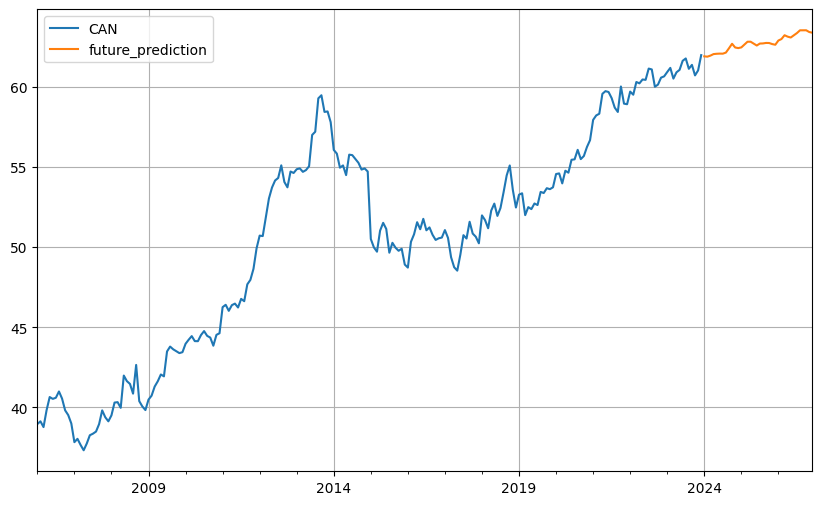

In [ ]:
df_month['future_prediction']=result.predict(start=216, end=255,dynamic=True, typ='levels')
df_month[['CAN','future_prediction']].plot(figsize=(10, 6))
plt.grid(True)

In [ ]:
filtered_df = df_month['2023':'2026']

In [ ]:
filtered_df

,CAN,forcast_SARIMA_1,future_prediction
2023-01-01,60.919857,60.747696,NaN
2023-02-01,61.176600,60.711327,NaN
2023-03-01,60.508042,60.721378,NaN
2023-04-01,60.900550,60.938838,NaN
2023-05-01,61.053429,61.243086,NaN
2023-06-01,61.618500,60.973210,NaN
2023-07-01,61.763909,61.033411,NaN
2023-08-01,61.119000,60.966832,NaN
2023-09-01,61.364381,61.102660,NaN
2023-10-01,60.708227,61.148816,NaN


In [ ]:
import datetime
from dateutil.relativedelta import relativedelta

start = datetime.datetime.strptime("01-01-2024", "%d-%m-%Y")
date_list = [start + relativedelta(months=x) for x in range(0, 36)]
future_prediction = pd.DataFrame(index=date_list, columns=df_month.columns)
df_month = pd.concat([df_month, future_prediction])

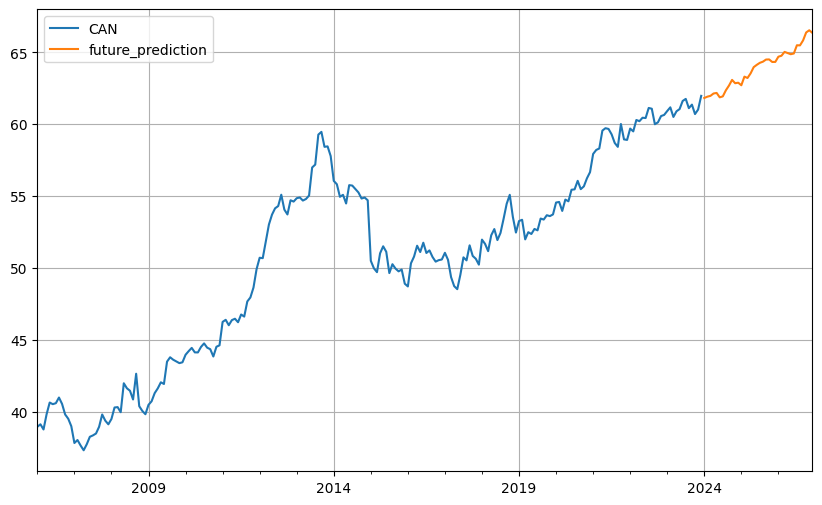

In [ ]:
df_month['future_prediction']=result.predict(start=216, end=255,dynamic=True, typ='levels')
df_month[['CAN','future_prediction']].plot(figsize=(10, 6))
plt.grid(True)

In [ ]:
filtered_df = df_month['2023':'2026']

In [ ]:
filtered_df

,CAN,forcast_SARIMA_1,future_prediction
2023-01-01,60.919857,61.251008,NaN
2023-02-01,61.176600,61.028704,NaN
2023-03-01,60.508042,61.367795,NaN
2023-04-01,60.900550,61.523774,NaN
2023-05-01,61.053429,61.907292,NaN
2023-06-01,61.618500,61.423296,NaN
2023-07-01,61.763909,60.725055,NaN
2023-08-01,61.119000,60.447813,NaN
2023-09-01,61.364381,60.886672,NaN
2023-10-01,60.708227,61.035866,NaN


<Axes: xlabel='Date'>

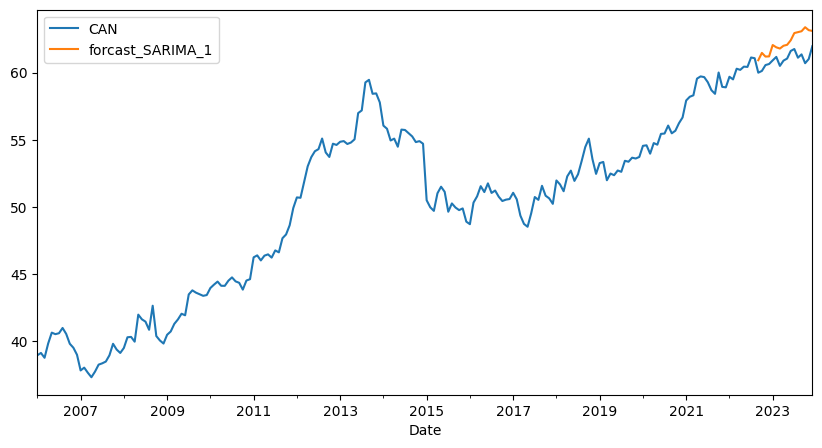

In [ ]:
predictions = result.predict(typ = 'levels')

In [ ]:
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df_month['CAN'],predictions)),'\n')
print('Mean Squared Error : ',mean_squared_error(df_month['CAN'],predictions),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df_month['CAN'],predictions),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df_month['CAN'],predictions)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_month['CAN'],predictions)))

Evaluation Result for whole data :  

R2 Score for whole data : 84.37 % 

Mean Squared Error :  7.57273415641451 

Mean Absolute Error :  0.7201650989687769 

Root Mean Squared Error :  2.7518601266079115 

Mean Absolute Percentage Error : 1.54 %


In [ ]:
import datetime
from dateutil.relativedelta import relativedelta

start = datetime.datetime.strptime("01-01-2024", "%d-%m-%Y")
date_list = [start + relativedelta(months=x) for x in range(0, 36)]
future_prediction = pd.DataFrame(index=date_list, columns=df_month.columns)
df_month = pd.concat([df_month, future_prediction])

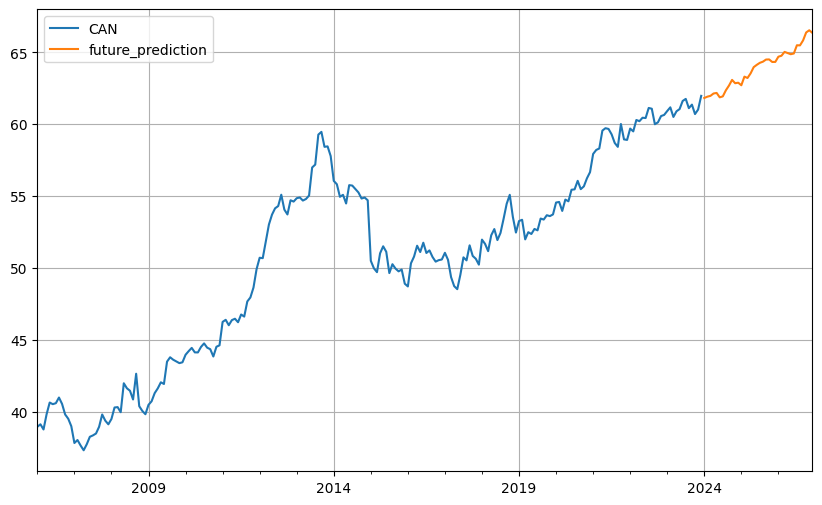

In [ ]:
df_month['future_prediction']=result.predict(start=216, end=255,dynamic=True)
df_month[['CAN','future_prediction']].plot(figsize=(10, 6))
plt.grid(True)

In [ ]:
filtered_df = df_month['2023':'2026']

In [ ]:
filtered_df

,CAN,CAN_1,forecast_ARIMA,forcast_SARIMA_1,future_prediction
2023-01-01,60.919857,0.271448,61.126381,61.251008,NaN
2023-02-01,61.176600,0.256743,61.123428,61.028704,NaN
2023-03-01,60.508042,-0.668558,61.126455,61.367795,NaN
2023-04-01,60.900550,0.392508,61.121958,61.523774,NaN
2023-05-01,61.053429,0.152879,61.123985,61.907292,NaN
2023-06-01,61.618500,0.565071,61.123493,61.423296,NaN
2023-07-01,61.763909,0.145409,61.123838,60.725055,NaN
2023-08-01,61.119000,-0.644909,61.123418,60.447813,NaN
2023-09-01,61.364381,0.245381,61.123760,60.886672,NaN
2023-10-01,60.708227,-0.656154,61.123630,61.035866,NaN
